<a href="https://colab.research.google.com/github/sriram-tech21/Travel_agent/blob/main/Test_medgamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys

google_colab = "google.colab" in sys.modules and not os.environ.get("VERTEX_PRODUCT")

if google_colab:
    from google.colab import userdata
    os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
else:
    if os.environ.get("VERTEX_PRODUCT") == "COLAB_ENTERPRISE":
        os.environ["HF_HOME"] = "/content/hf"
    from huggingface_hub import get_token
    if get_token() is None:
        from huggingface_hub import notebook_login
        notebook_login()

In [ ]:
! pip install --upgrade --quiet accelerate bitsandbytes transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 14.7 MB/s eta 0:00:00


In [ ]:
from transformers import BitsAndBytesConfig
import torch

model_variant = "4b-it"
model_id = f"google/medgemma-{model_variant}"

use_quantization = True

if "27b" in model_variant and google_colab:
    if not ("A100" in torch.cuda.get_device_name(0) and use_quantization):
        raise ValueError(
            "Runtime has insufficient memory to run the 27B variant. "
            "Please select an A100 GPU and use 4-bit quantization."
        )

model_kwargs = dict(
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

if use_quantization:
    model_kwargs["quantization_config"] = BitsAndBytesConfig(load_in_4bit=True)

In [ ]:
if "text" in model_variant:
    raise ValueError(
        "You are using a text-only variant which does not support multimodal "
        "inputs. Please proceed to the 'Run inference on text only' section."
    )

In [ ]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

prompt = "Describe this image"

image_url = "/content/x-ray-8470739_1280.jpg"
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

In [ ]:
system_instruction = "You are an expert ophthalmologist."

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image}
        ]
    }
]

In [ ]:
from transformers import pipeline

pipe = pipeline(
    "image-text-to-text",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

config.json:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!
`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda:0




---

**[ User ]**

Describe this image

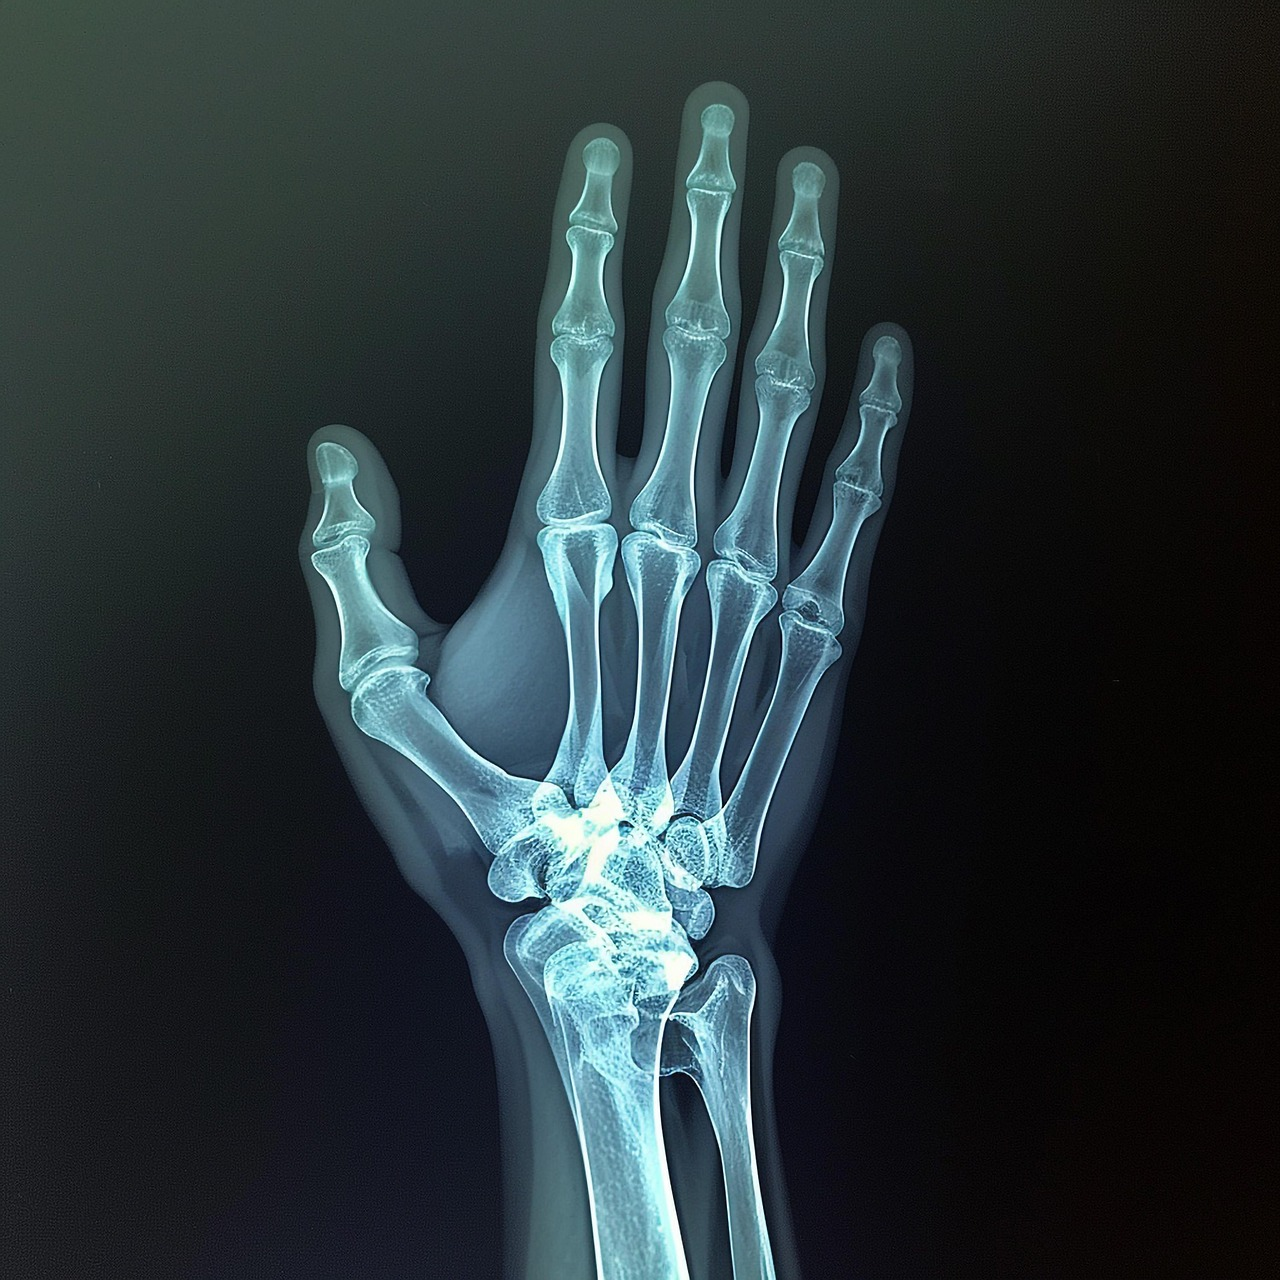



---

**[ MedGemma ]**

Okay, as an ophthalmologist, I can't provide a diagnosis based solely on this image. However, I can describe the anatomical structures visible in this X-ray of the forearm and hand.

**Description:**

The image shows a lateral (side) view of the forearm and hand. The bones are clearly visible as white structures against the black background.

*   **Forearm Bones:** The prominent bones are the radius and ulna, which form the main shaft of the forearm. The radius is the larger of the two bones and is visible on the thumb side of the forearm. The ulna is the smaller bone and is visible on the pinky side of the forearm.

*   **Hand Bones:** The image also shows the bones of the hand, including the metacarpals (the long bones of the palm) and the phalanges (the smaller bones of the fingers and thumb). The metacarpals are visible as the long bones of the palm. The phalanges are the smaller bones that make up the fingers and thumb.

*   **Joints:** The image shows the joints where the bones meet, such as the wrist joint (where the radius and ulna meet) and the knuckles (where the metacarpals meet the phalanges).

**Important Considerations:**

*   **This is not a diagnostic image.** It's a general anatomical view.
*   **I cannot provide a diagnosis.** To determine the cause of any abnormalities, a

---



In [ ]:
output = pipe(text=messages, max_new_tokens=300)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"\n\n---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename,height=300))
display(Markdown(f"\n\n---\n\n**[ MedGemma ]**\n\n{response}\n\n---\n\n"))

TO run TEXT


In [ ]:
from IPython.display import Markdown

prompt = "MY arm is paining whenever i put pressure on it, what is the diagnosis?"  # @param {type: "string"}

system_instruction = "You are a helpful medical assistant."

messages = [
    {
        "role": "system",
        "content": system_instruction
    },
    {
        "role": "user",
        "content": prompt
    }
]

In [ ]:
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [ ]:
output = pipe(messages, max_new_tokens=500)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"\n\n---\n\n**[ User ]**\n\n{prompt}\n\n---\n\n"))
display(Markdown(f"**[ MedGemma ]**\n\n{response}\n\n---\n\n"))



---

**[ User ]**

MY arm is paining whenever i put pressure on it, what is the diagnosis?

---



**[ MedGemma ]**

Okay, I understand your arm is painful when you put pressure on it. I'm an AI and can't give you a diagnosis, but I can suggest some potential causes of arm pain when applying pressure.  It's important to seek professional medical advice for a proper diagnosis, but here are some possibilities:

*   **Muscle Strain or Sprain:** This is a very common cause of arm pain. It can happen from overuse, injury, or sudden movements. The pain might be localized to a specific area and worsen with movement or pressure.

*   **Tendonitis:** Inflammation of a tendon, which can be caused by overuse or repetitive motions.

*   **Bursitis:** Inflammation of a bursa (a fluid-filled sac that reduces friction between bones, tendons, and ligaments).

*   **Nerve Compression:** Pressure on a nerve can cause pain, numbness, tingling, or weakness in the arm.

*   **Fracture:** A broken bone in the arm. This usually presents with significant pain and limited movement.

*   **Arthritis:** Inflammation of the joints in the arm.

*   **Other Conditions:** Less common conditions could also be responsible for this pain.

To help a medical professional determine the cause, they might ask you about:

*   **Location of the pain:** Where exactly does it hurt?
*   **How did the pain start?** Was it from a specific injury, or gradually worsening?
*   **What makes the pain better or worse?**
*   **Any other symptoms?** (e.g., numbness, tingling, weakness, swelling)
*   **Your medical history**

**What you should do:**

1.  **Rest:** Avoid activities that aggravate the pain.
2.  **Ice:** Apply ice to the painful area for 15-20 minutes at a time, several times a day, especially in the first few days.
3.  **Compression:** Use a bandage to compress the area, but be careful not to wrap it too tightly.
4.  **Elevation:** Keep your arm elevated above your heart as much as possible.
5.  **Seek medical attention:** It's crucial to see a doctor or other qualified healthcare provider to get an accurate diagnosis and appropriate treatment plan.

**Disclaimer:** This information is for general knowledge and informational purposes only, and does not constitute medical advice.

---



In [ ]:
!pip install gradio -q

import gradio as gr
from PIL import Image

def run_medgemma(image, text_prompt):
    if image is None:
        return "Please upload an image.", None

    img_messages = [
        {"role": "system", "content": [{"type": "text", "text": "You are an expert ophthalmologist."}]},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": text_prompt},
                {"type": "image", "image": image}
            ]
        }
    ]

    img_result = pipe(
        img_messages,
        max_new_tokens=300
    )
    image_text_output = img_result[0]["generated_text"][-1]["content"]

    text_messages = [
        {"role": "system", "content": "You are a helpful medical assistant."},
        {"role": "user", "content": text_prompt}
    ]

    text_result = pipe_text(text_messages, max_new_tokens=200)
    text_output = text_result[0]["generated_text"][-1]["content"]

    return image_text_output + "\n\n---\n\n" + text_output, image

pipe_text = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs=model_kwargs,
)
pipe_text.model.generation_config.do_sample = False

with gr.Blocks() as demo:
    gr.Markdown("# 🩺 MedGemma Multimodal Interface\nUpload an image + enter a symptom prompt.")

    with gr.Row():
        image_input = gr.Image(type="pil", label="Upload Image")
        text_input = gr.Textbox(label="Enter your prompt")

    run_button = gr.Button("Run Diagnosis")

    with gr.Row():
        output_text = gr.Textbox(label="Model Output", lines=15)
        output_image = gr.Image(label="Input Image (for reference)")

    run_button.click(
        fn=run_medgemma,
        inputs=[image_input, text_input],
        outputs=[output_text, output_image]
    )

demo.launch(debug=True)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://dc2d945f6968c7e199.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
